In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, auc,\
confusion_matrix, classification_report, roc_auc_score, roc_curve, cohen_kappa_score, precision_recall_curve

from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('X_train_transformed_v3.csv', index_col=0)
X_test = pd.read_csv('X_test_transformed_v3.csv', index_col=0)
y_train = pd.read_csv('y_train_v3.csv', index_col=0)
y_test = pd.read_csv('y_test_v3.csv', index_col=0)

In [3]:
def plot_roc_curve(algorithm_name, model):
    plt.figure(figsize = (12, 7))
    y_pred_proba = model.predict_proba(X_test)
    roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label = 'ROC score: {}'.format(round(roc_score,4)))
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('FPR (1-Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    plt.legend()
    plt.grid()
    plt.title("ROC Curve for {} model".format(algorithm_name))
    plt.show()
    
def plot_precision_recall_curve(algorithm_name, model):
    plt.figure(figsize = (12, 7))
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
    prec_score = auc(recall, precision)
    plt.plot(recall, precision, label = 'AUC PR score: {}'.format(round(prec_score,4)))
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.title("Precision-Recall Curve for {} model".format(algorithm_name))
    plt.show()    

def plot_confusion_matrix(algorithm_name, model):
    y_pred = model.predict(X_test)
    cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred), index = ['Actual:0', 'Actual:1'], 
             columns = ['Predicted:0', 'Predicted:1'])
    plt.figure(figsize = (5,5))
    sns.heatmap(cm, cbar = False, annot = True, fmt = '.2f',\
                cmap = ListedColormap('Thistle'), linewidths=0.2, linecolor='white')
    plt.title("Confusion matrix for {} model".format(algorithm_name))
    plt.show()
    
def plot_classification_report(algorithm_name, model):
    print("Classification report for {} model:".format(algorithm_name))
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def plot_feature_importance(algorithm_name, model):
    plt.figure(figsize = (20, 12))
    feat_imp = pd.DataFrame(model.feature_importances_, index = X_test.columns, columns = ['Importance'])
    feat_imp = feat_imp.sort_values(by = "Importance", ascending=False)
    sns.barplot(x = feat_imp['Importance'], y = feat_imp.index)
    plt.title("Feature importance according to {} model".format(algorithm_name))
    plt.show()

score_card = pd.DataFrame(columns = ['model', 'train score', 'test score', 'precision', 'recall',\
                                     'f1_score', 'kappa score', 'auc-pr score','roc_score'])
def update_score_card(algorithm_name, model):
    global score_card
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    score_card = score_card.append({
        'model': algorithm_name, 
        'train score': model.score(X_train, y_train), 
        'test score': model.score(X_test, y_test), 
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted'), 
        'kappa score': cohen_kappa_score(y_test, y_pred), 
        'auc-pr score': auc(recall, precision),
        'roc_score':roc_auc_score(y_test, y_pred_proba, average='weighted')}, 
    ignore_index = True)
    
    return score_card

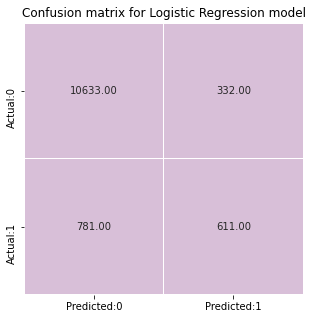

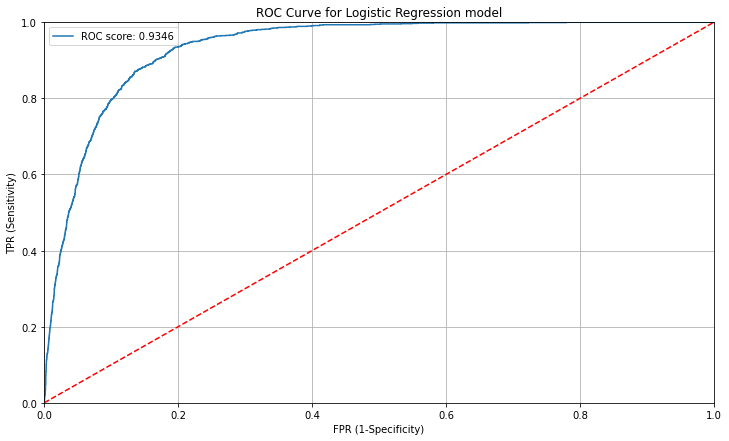

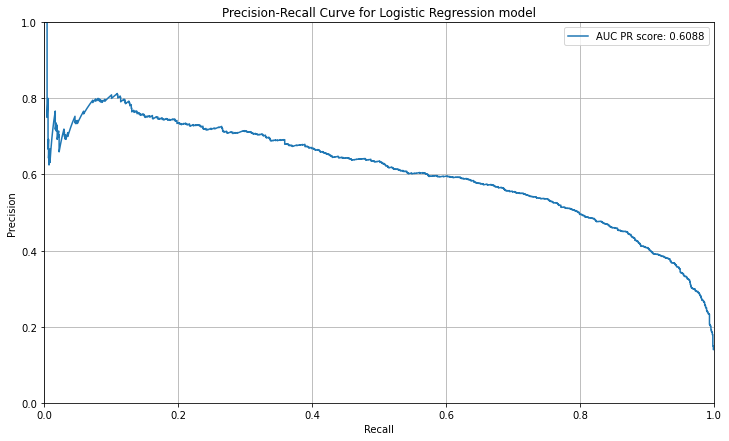

Classification report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.44      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.91197,0.90993,0.899623,0.90993,0.902173,0.475629,0.60877,0.934566


In [4]:
# Logistic Regression
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
plot_confusion_matrix('Logistic Regression', logreg_model)
plot_roc_curve('Logistic Regression', logreg_model)
plot_precision_recall_curve('Logistic Regression', logreg_model)
plot_classification_report('Logistic Regression', logreg_model)
# plot_feature_importance('Logistic Regression', logreg_model)
update_score_card('Logistic Regression', logreg_model)

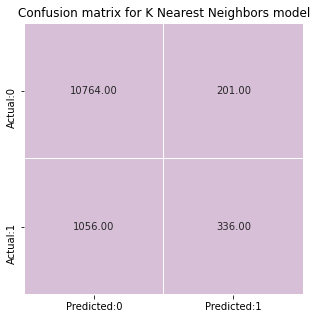

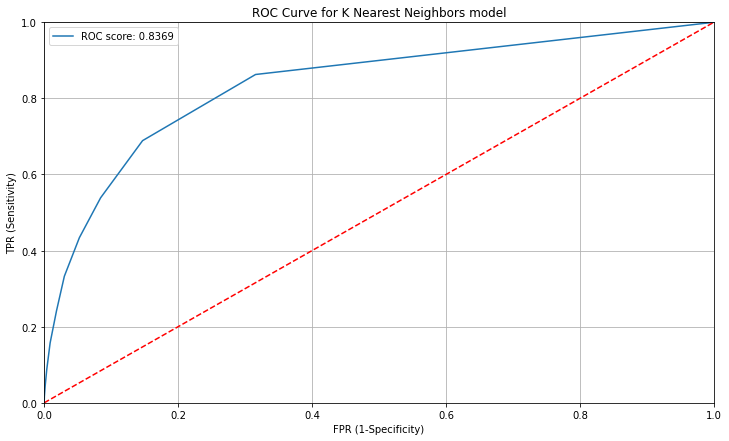

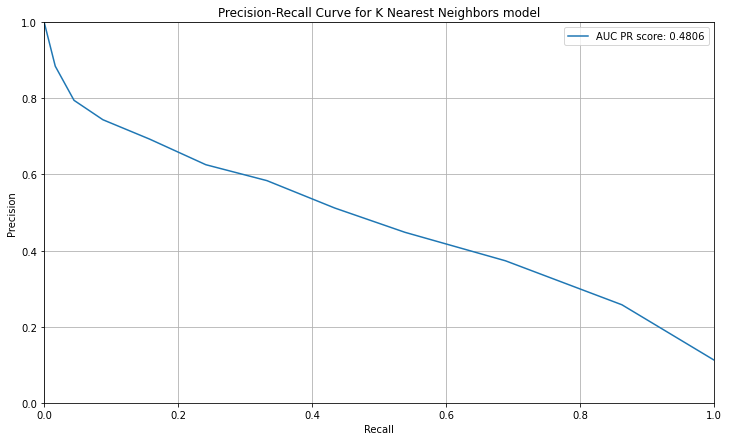

Classification report for K Nearest Neighbors model:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10965
           1       0.63      0.24      0.35      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882


In [5]:
# KNearestneighbours
kneighbors = KNeighborsClassifier(n_neighbors= 10)
kneighbors_model = kneighbors.fit(X_train, y_train)
plot_confusion_matrix('K Nearest Neighbors', kneighbors_model)
plot_roc_curve('K Nearest Neighbors', kneighbors_model)
plot_precision_recall_curve('K Nearest Neighbors', kneighbors_model)
plot_classification_report('K Nearest Neighbors', kneighbors_model)
update_score_card('K Nearest Neighbors', kneighbors_model)

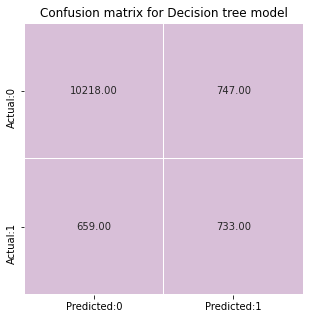

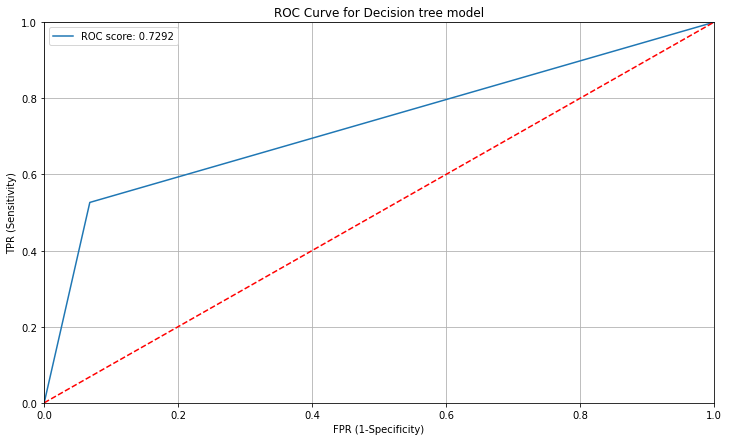

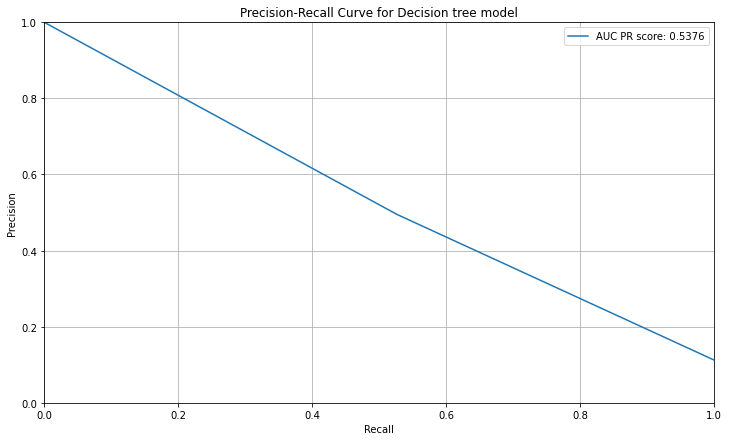

Classification report for Decision tree model:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10965
           1       0.50      0.53      0.51      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



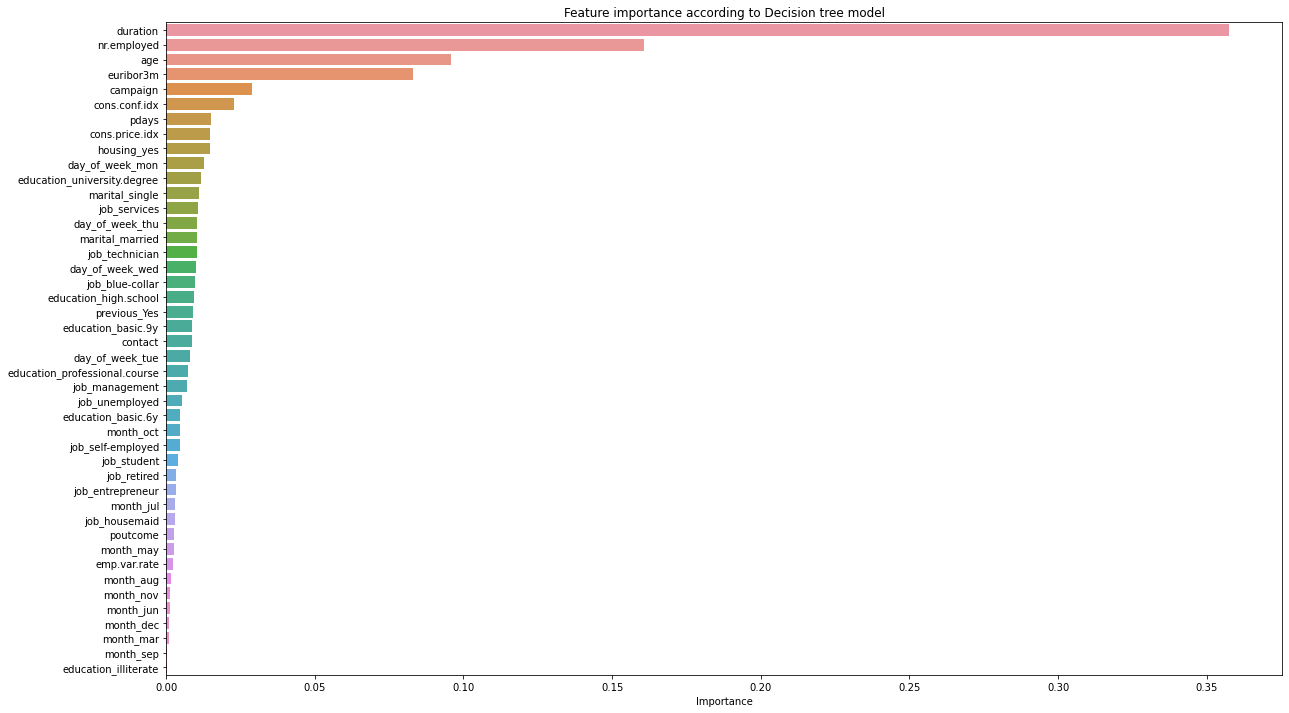

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227


In [6]:
# Decision tree
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
plot_confusion_matrix('Decision tree', dtree_model)
plot_roc_curve('Decision tree', dtree_model)
plot_precision_recall_curve('Decision tree', dtree_model)
plot_classification_report('Decision tree', dtree_model)
plot_feature_importance('Decision tree', dtree_model)
update_score_card('Decision tree', dtree_model)

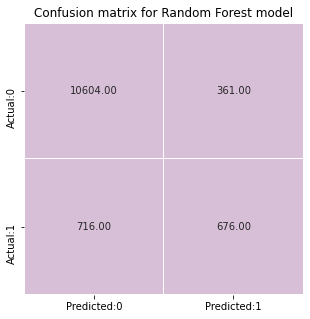

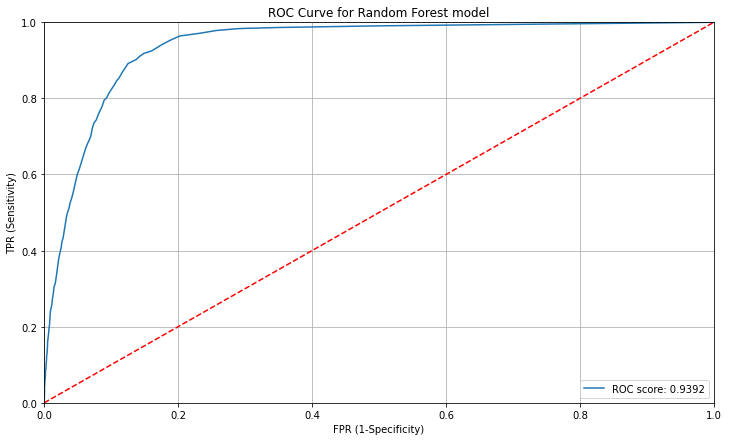

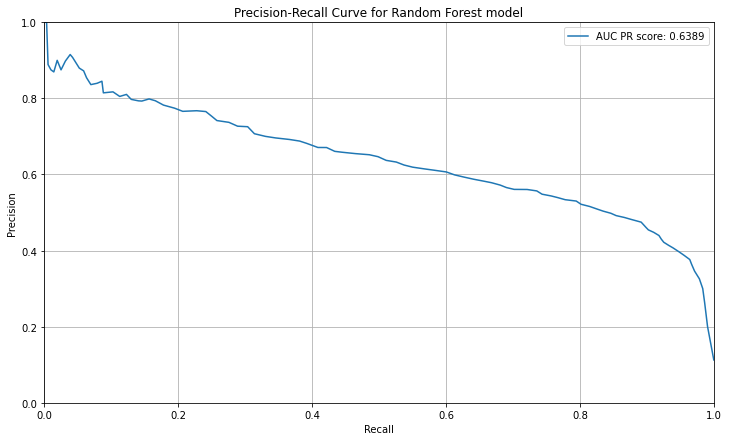

Classification report for Random Forest model:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.65      0.49      0.56      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.75     12357
weighted avg       0.90      0.91      0.91     12357



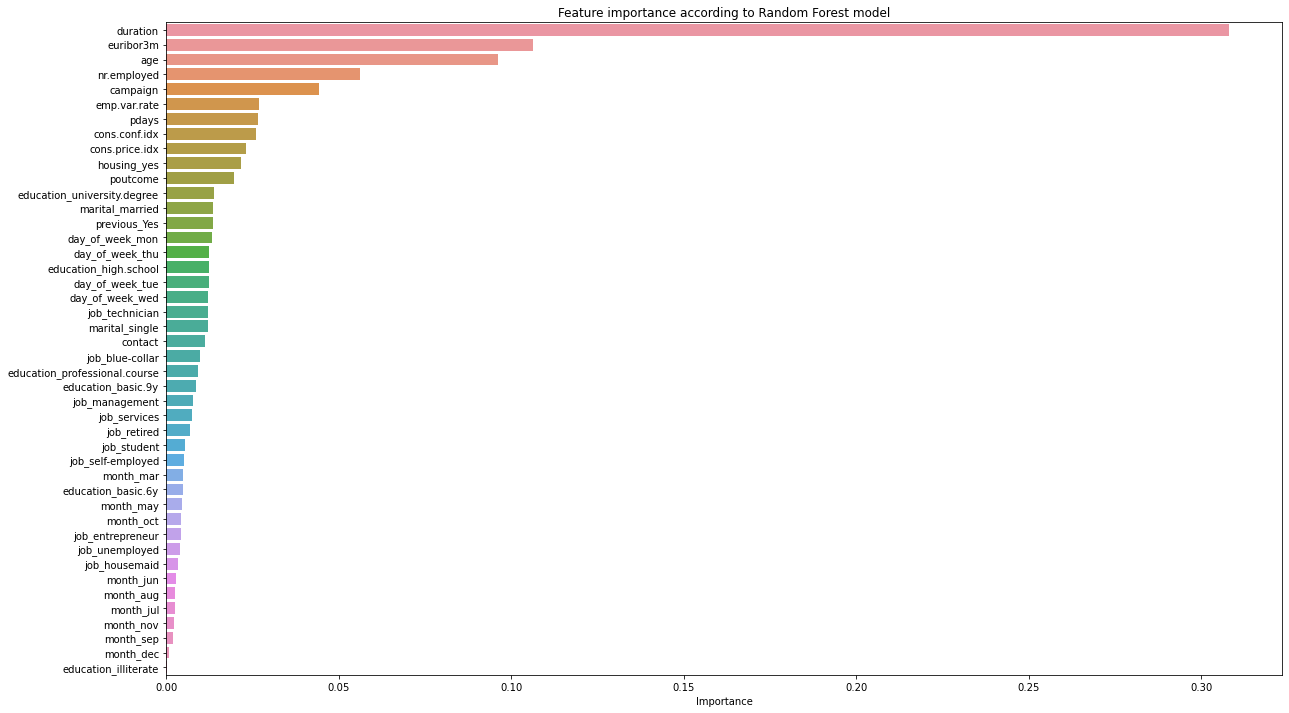

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180


In [7]:
# RandomForest classifier
random_forest = RandomForestClassifier()
random_forest_model = random_forest.fit(X_train, y_train)
plot_confusion_matrix('Random Forest', random_forest_model)
plot_roc_curve('Random Forest', random_forest_model)
plot_precision_recall_curve('Random Forest', random_forest_model)
plot_classification_report('Random Forest', random_forest_model)
plot_feature_importance('Random Forest', random_forest_model)
update_score_card('Random Forest', random_forest_model)

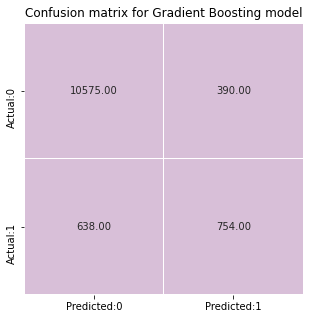

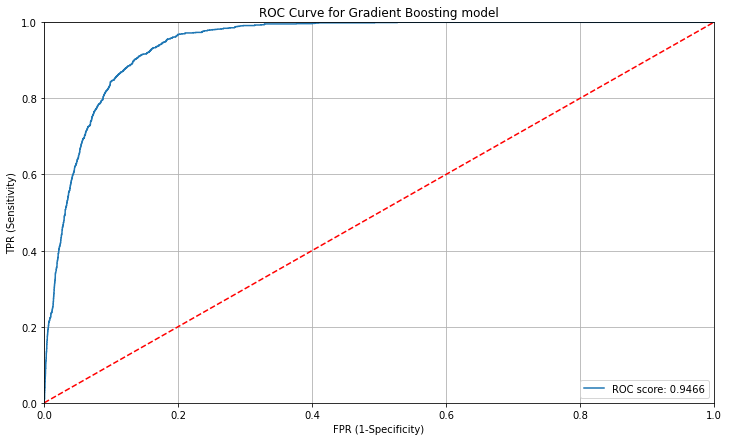

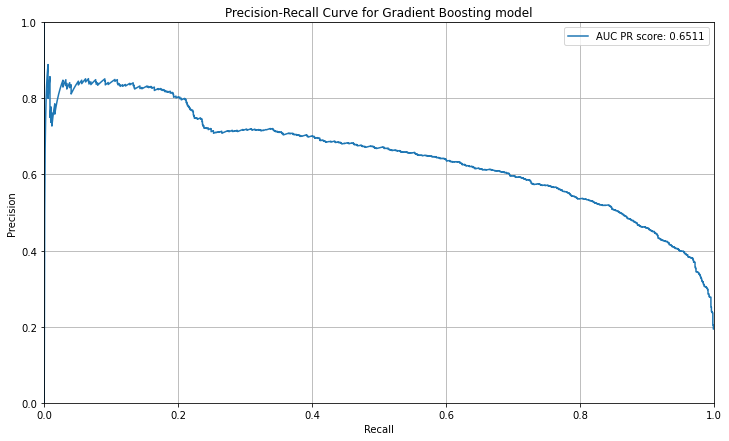

Classification report for Gradient Boosting model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.66      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



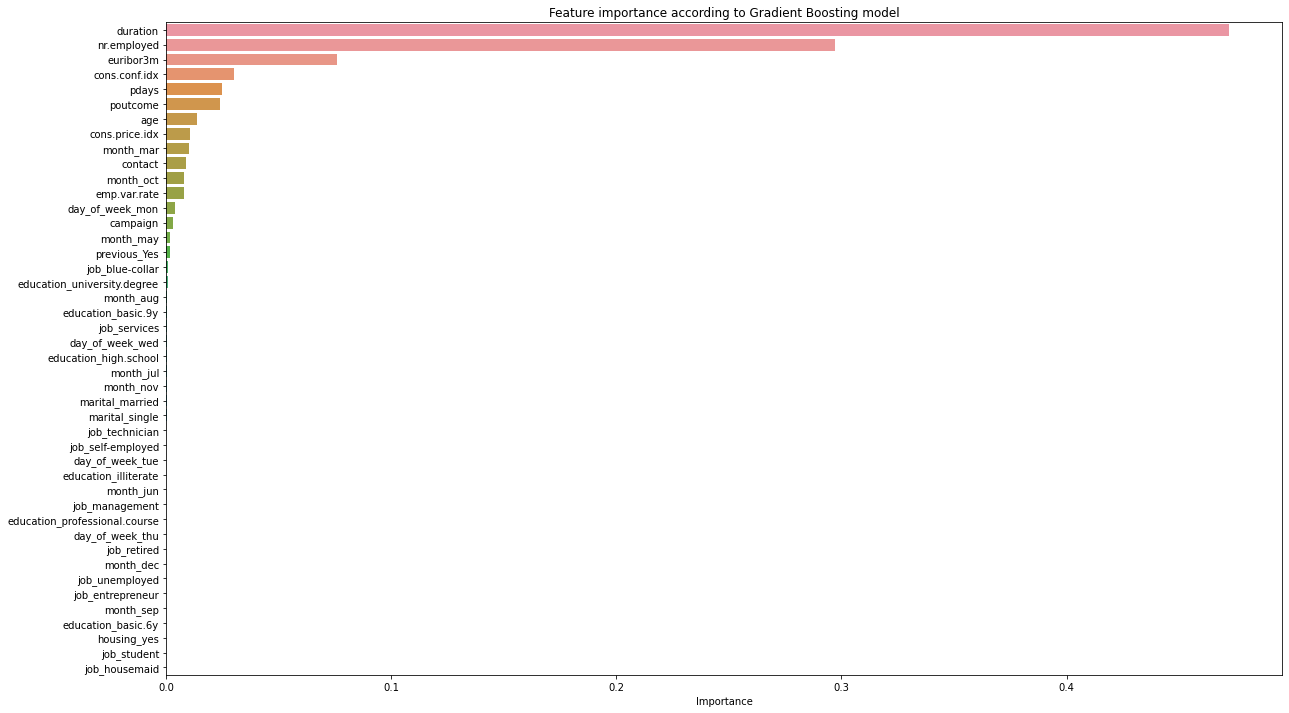

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643


In [8]:
# Gradient Boosting classifier
grad_boost = GradientBoostingClassifier()
grad_boost_model = grad_boost.fit(X_train, y_train)
plot_confusion_matrix('Gradient Boosting', grad_boost_model)
plot_roc_curve('Gradient Boosting', grad_boost_model)
plot_precision_recall_curve('Gradient Boosting', grad_boost_model)
plot_classification_report('Gradient Boosting', grad_boost_model)
plot_feature_importance('Gradient Boosting', grad_boost_model)
update_score_card('Gradient Boosting', grad_boost_model)

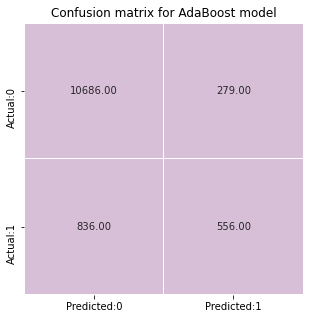

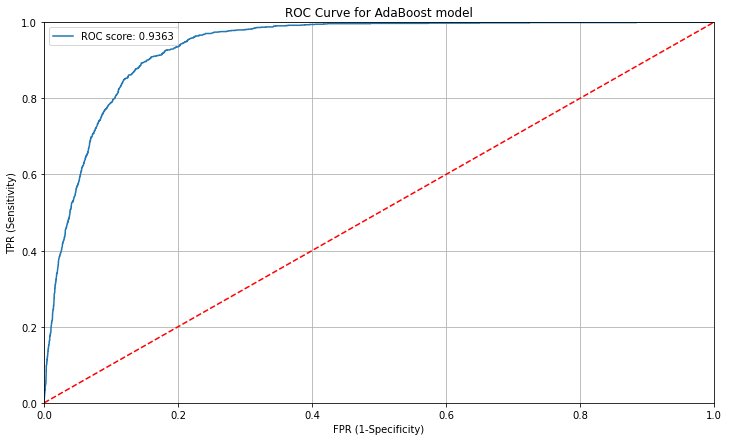

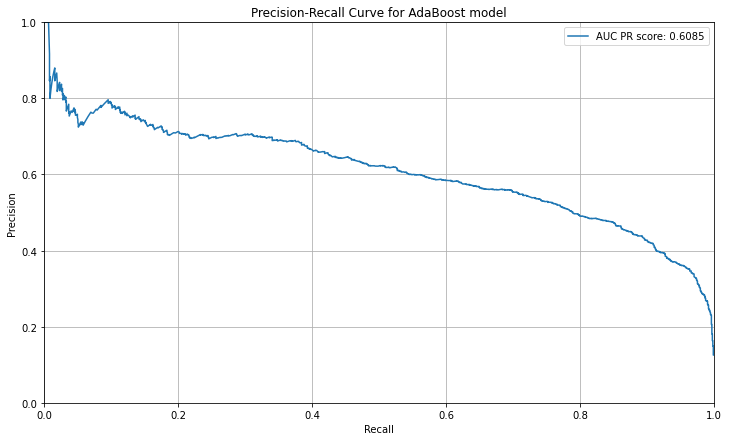

Classification report for AdaBoost model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.40      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



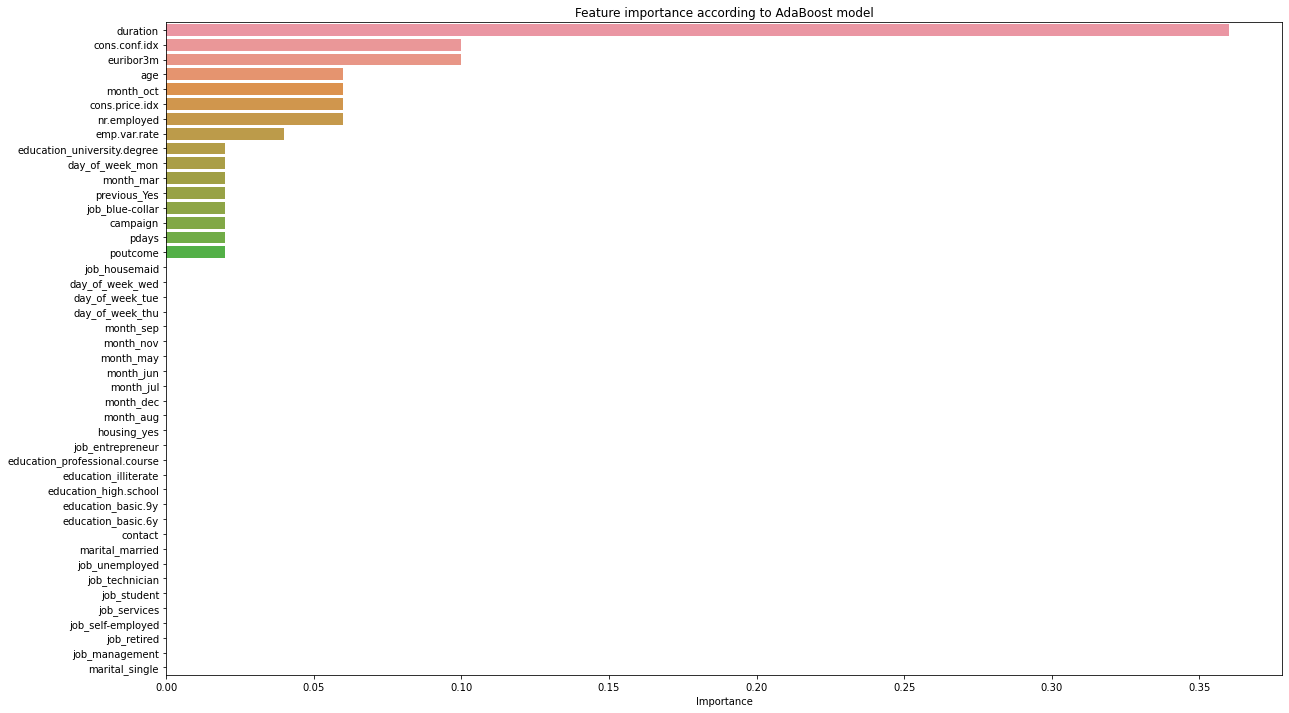

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286


In [9]:
# Adaboost classifier
adaboost = AdaBoostClassifier()
adaboost_model = adaboost.fit(X_train, y_train)
plot_confusion_matrix('AdaBoost', adaboost_model)
plot_roc_curve('AdaBoost', adaboost_model)
plot_precision_recall_curve('AdaBoost', adaboost_model)
plot_classification_report('AdaBoost', adaboost_model)
plot_feature_importance('AdaBoost', adaboost_model)
update_score_card('AdaBoost', adaboost_model)

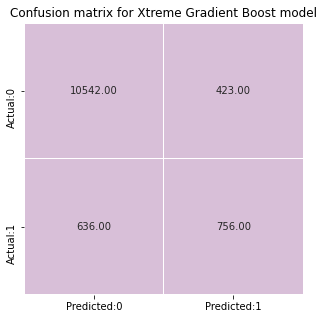

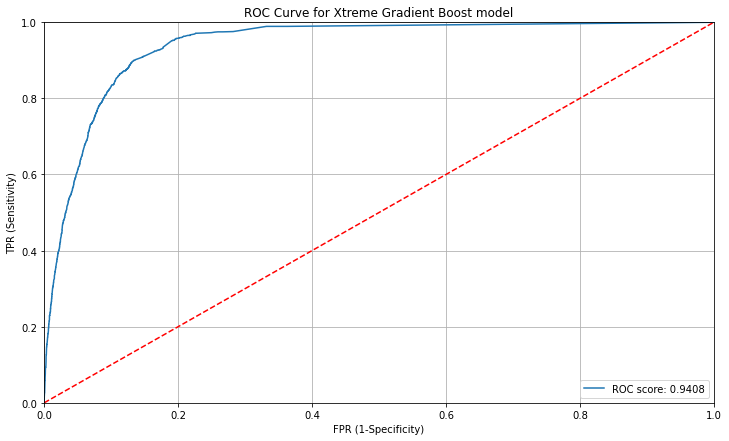

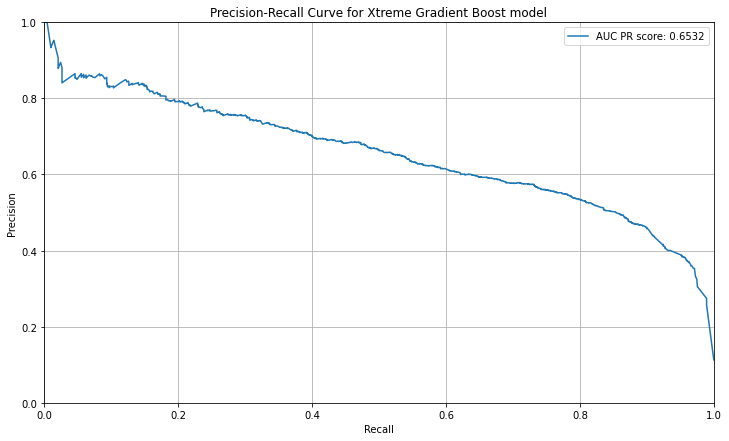

Classification report for Xtreme Gradient Boost model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.54      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



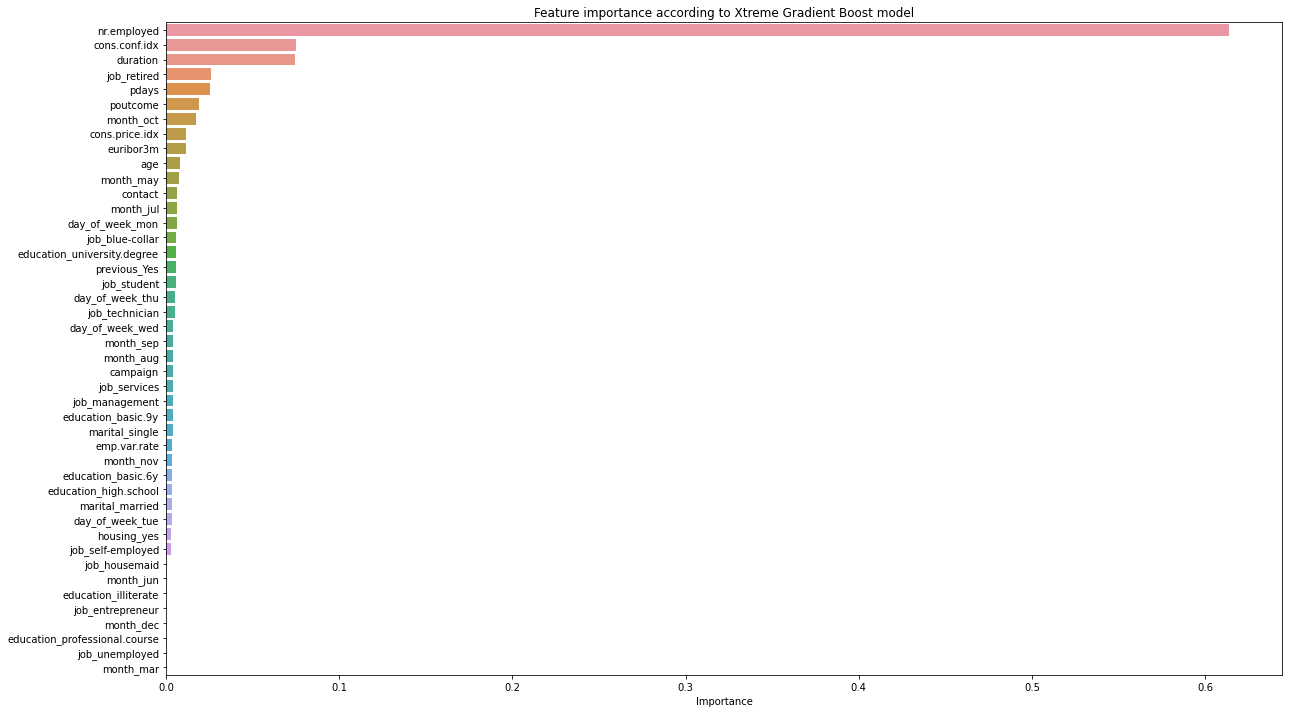

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849


In [10]:
# Xtreme Gradient Boost CLassifier
xgb_base = XGBClassifier(learning_rate = 0.01, gamma = 2, eval_metric = 'logloss')
xgb_model = xgb_base.fit(X_train, y_train)
plot_confusion_matrix('Xtreme Gradient Boost', xgb_model)
plot_roc_curve('Xtreme Gradient Boost', xgb_model)
plot_precision_recall_curve('Xtreme Gradient Boost', xgb_model)
plot_classification_report('Xtreme Gradient Boost', xgb_model)
plot_feature_importance('Xtreme Gradient Boost', xgb_model)
update_score_card('Xtreme Gradient Boost', xgb_model)

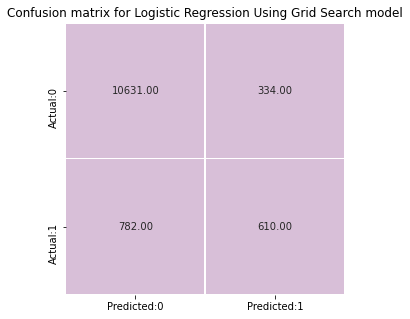

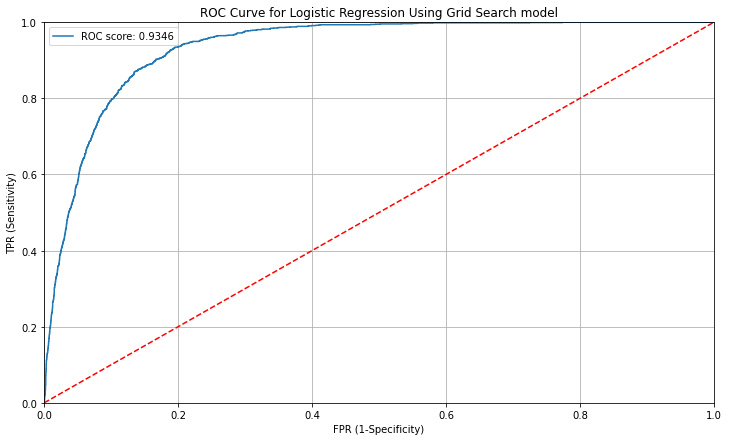

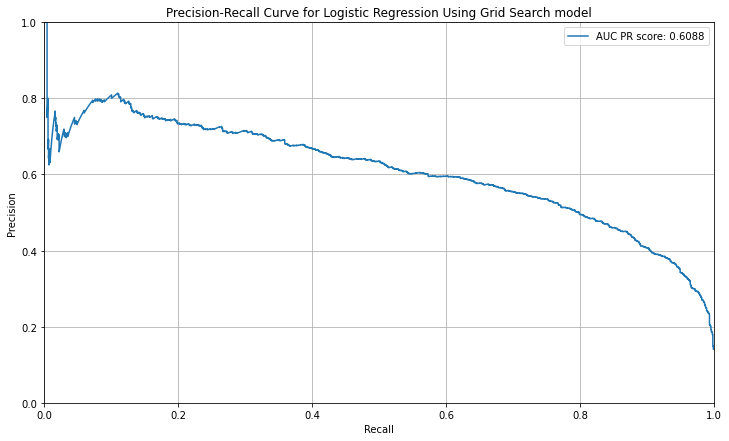

Classification report for Logistic Regression Using Grid Search model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.65      0.44      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594


In [11]:
# Grid Search over Logistic Regression
params_grid = {'C': np.logspace(-4, 4, 50),\
    'penalty': ['l1', 'l2']}
    
logreg_grid = GridSearchCV(estimator = logreg, param_grid = params_grid, cv = 5,\
                           scoring = 'recall', n_jobs = 10)    

logreg_grid = logreg_grid.fit(X_train, y_train)
# Building Logistic Regression model using the best parameters obtained by grid search:
logreg_grid_model = LogisticRegression(C = logreg_grid.best_params_.get('C'),\
                                         penalty= logreg_grid.best_params_.get('penalty'))

logreg_grid_model = logreg_grid_model.fit(X_train, y_train)

plot_confusion_matrix('Logistic Regression Using Grid Search', logreg_grid_model)
plot_roc_curve('Logistic Regression Using Grid Search', logreg_grid_model)
plot_precision_recall_curve('Logistic Regression Using Grid Search', logreg_grid_model)
plot_classification_report('Logistic Regression Using Grid Search', logreg_grid_model)
# plot_feature_importance('Logistic Regression', logreg_model)
update_score_card('Logistic Regression Using Grid Search', logreg_grid_model)

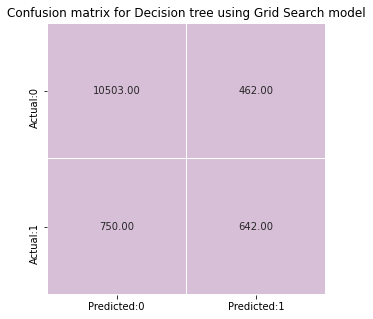

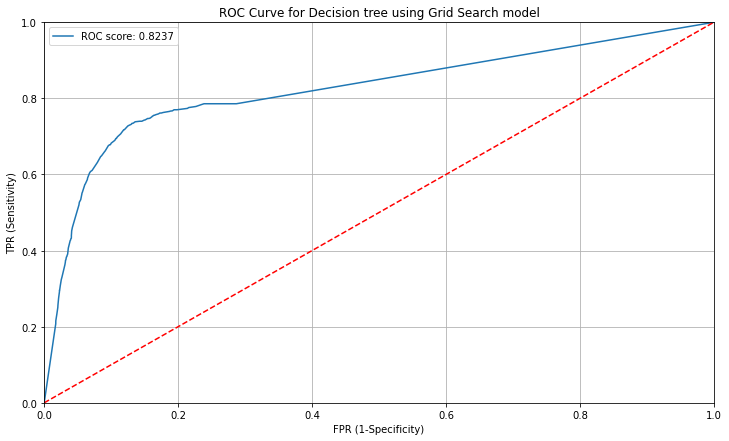

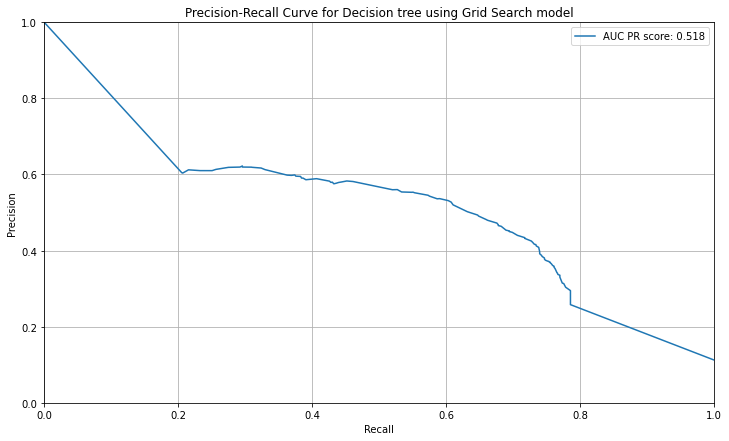

Classification report for Decision tree using Grid Search model:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10965
           1       0.58      0.46      0.51      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.71      0.73     12357
weighted avg       0.89      0.90      0.90     12357



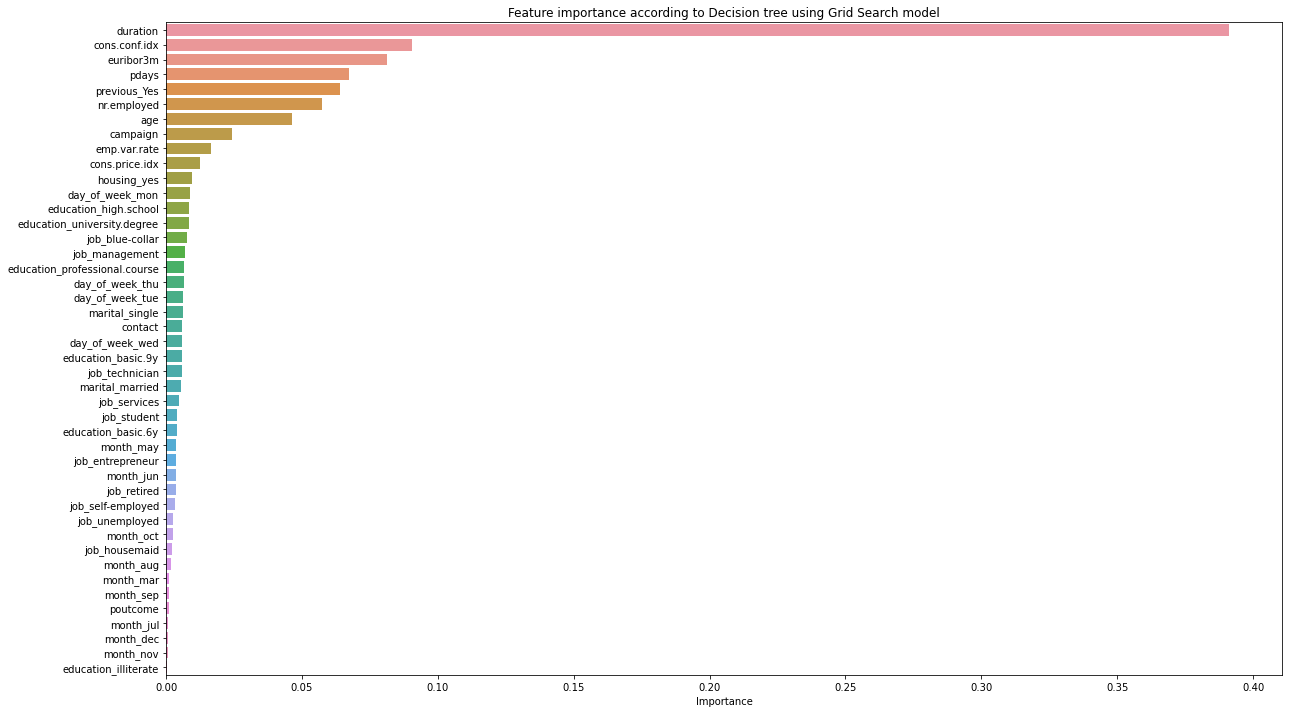

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594
8,Decision tree using Grid Search,0.943047,0.901918,0.893718,0.901918,0.896895,0.460679,0.518049,0.823696


In [12]:
# GridSearch over DecisionTree
params_grid = {'criterion': ['gini', 'entropy'], \
              "max_features": ['sqrt', 'log2'],\
              "max_depth": range(2, 20),
              "min_samples_split": range(2, 20)}

tree_grid = GridSearchCV(estimator=dtree, param_grid=params_grid, cv = 5, scoring = 'recall', n_jobs=10)
tree_grid = tree_grid.fit(X_train, y_train)

# Building Decision tree using the best parameters obtained by grid search:
dtree_grid_model = DecisionTreeClassifier(criterion= tree_grid.best_params_.get('criterion'),\
                                         max_features= tree_grid.best_params_.get('max_features'),\
                                         max_depth= tree_grid.best_params_.get('max_depth'),\
                                         min_samples_split= tree_grid.best_params_.get('min_samples_split'))

dtree_grid_model = dtree_grid_model.fit(X_train, y_train)
plot_confusion_matrix('Decision tree using Grid Search', dtree_grid_model)
plot_roc_curve('Decision tree using Grid Search', dtree_grid_model)
plot_precision_recall_curve('Decision tree using Grid Search', dtree_grid_model)
plot_classification_report('Decision tree using Grid Search', dtree_grid_model)
plot_feature_importance('Decision tree using Grid Search', dtree_grid_model)
update_score_card('Decision tree using Grid Search', dtree_grid_model)

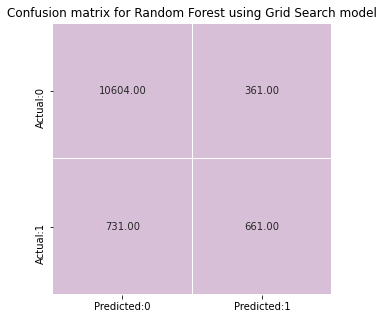

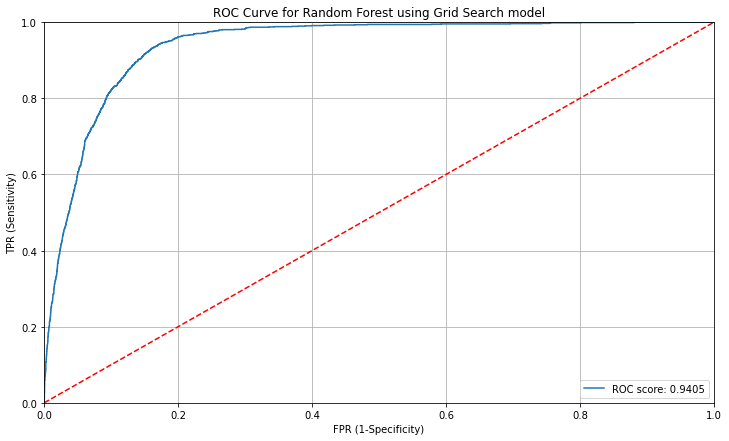

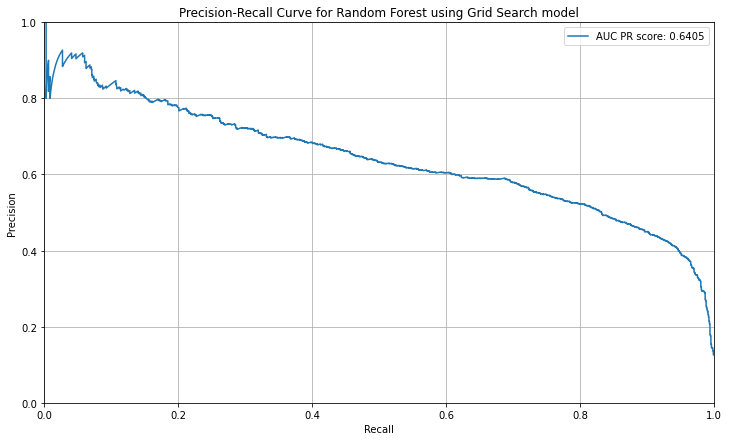

Classification report for Random Forest using Grid Search model:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.65      0.47      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



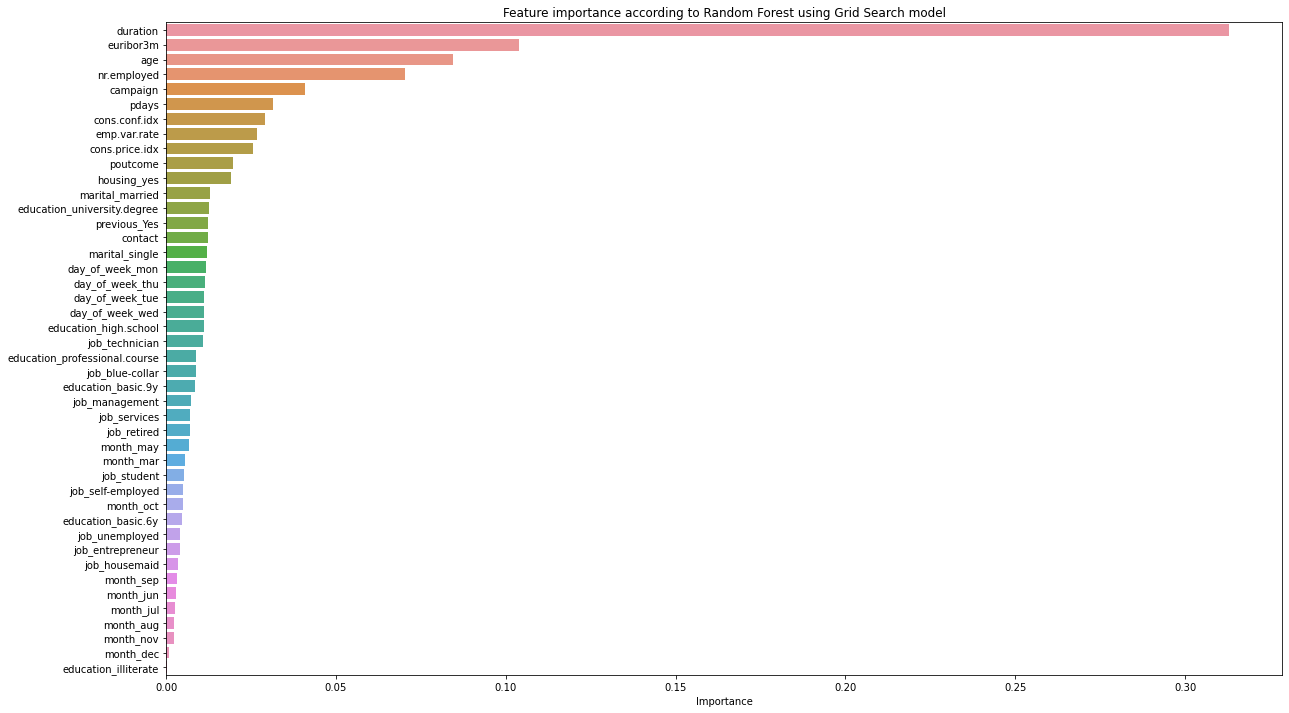

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594
8,Decision tree using Grid Search,0.943047,0.901918,0.893718,0.901918,0.896895,0.460679,0.518049,0.823696
9,Random Forest using Grid Search,0.992369,0.911629,0.902983,0.911629,0.905590,0.499942,0.640495,0.940465


In [13]:
# GridSearch over RandomForest
rf_params_grid = {'n_estimators': [ 50 , 70 , 100], \
                'criterion': ['gini', 'entropy'], \
              "max_features": ['sqrt', 'log2'],\
                "max_depth": range(2, 20)}

rf_grid = GridSearchCV(estimator=random_forest, param_grid=rf_params_grid, cv = 5,\
                       scoring = 'recall', n_jobs=10)
rf_grid = rf_grid.fit(X_train, y_train)


# Building Random Forest classifier using the best parameters obtained by grid search:
rf_grid_model = RandomForestClassifier(n_estimators= rf_grid.best_params_.get('n_estimators'),\
                                        criterion= rf_grid.best_params_.get('criterion'),\
                                         max_features= rf_grid.best_params_.get('max_features'),\
                                         max_depth=  rf_grid.best_params_.get('max_depth'))

rf_grid_model = rf_grid_model.fit(X_train, y_train)
plot_confusion_matrix('Random Forest using Grid Search', rf_grid_model)
plot_roc_curve('Random Forest using Grid Search', rf_grid_model)
plot_precision_recall_curve('Random Forest using Grid Search', rf_grid_model)
plot_classification_report('Random Forest using Grid Search', rf_grid_model)
plot_feature_importance('Random Forest using Grid Search', rf_grid_model)
update_score_card('Random Forest using Grid Search', rf_grid_model)

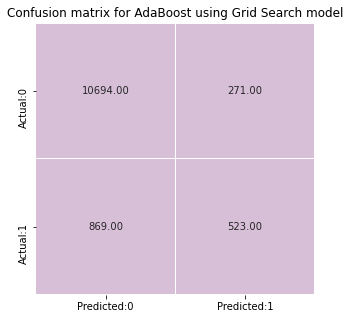

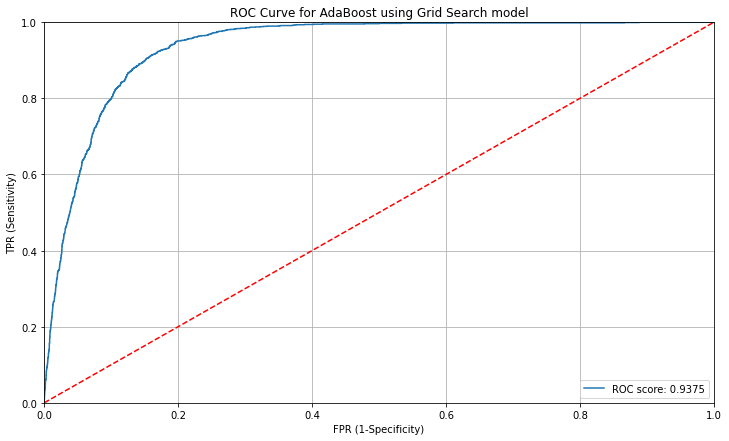

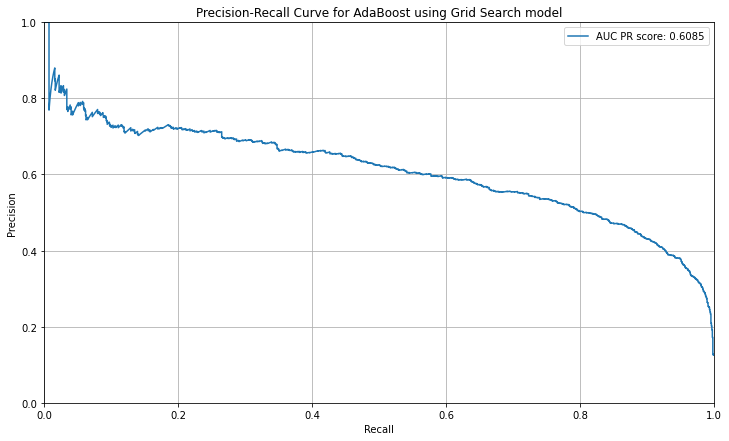

Classification report for AdaBoost using Grid Search model:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.66      0.38      0.48      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.71     12357
weighted avg       0.89      0.91      0.90     12357



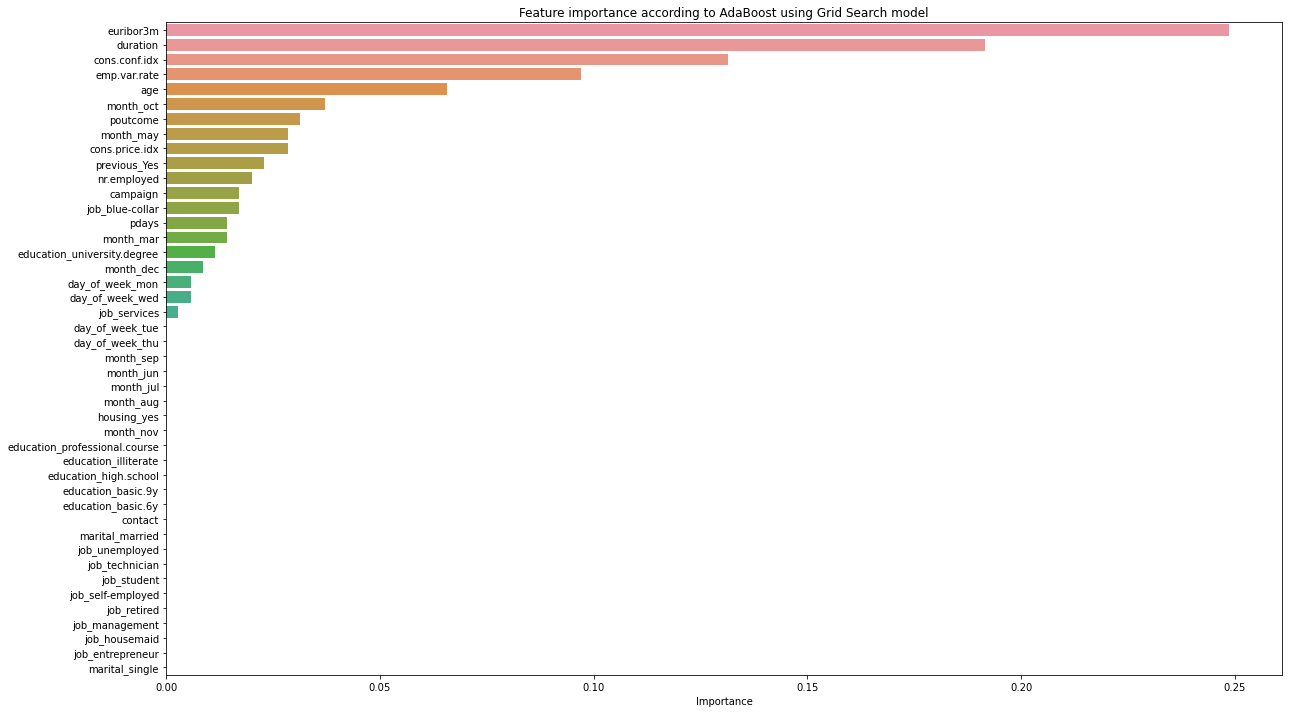

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594
8,Decision tree using Grid Search,0.943047,0.901918,0.893718,0.901918,0.896895,0.460679,0.518049,0.823696
9,Random Forest using Grid Search,0.992369,0.911629,0.902983,0.911629,0.905590,0.499942,0.640495,0.940465


In [14]:
# Grid Search over Adaboost model:
params_grid = {"n_estimators" : [100, 120, 150, 200, 250, 300, 350],\
               "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015] }

adamodel_grid = GridSearchCV(estimator=adaboost, param_grid=params_grid, cv = 5, scoring = 'recall', n_jobs=10)
adamodel_grid = adamodel_grid.fit(X_train, y_train)

adamodel_grid = AdaBoostClassifier(n_estimators = adamodel_grid.best_params_.get('n_estimators'),
                                  learning_rate = adamodel_grid.best_params_.get('learning_rate'))
adamodel_grid = adamodel_grid.fit(X_train, y_train)

plot_confusion_matrix('AdaBoost using Grid Search', adamodel_grid)
plot_roc_curve('AdaBoost using Grid Search', adamodel_grid)
plot_precision_recall_curve('AdaBoost using Grid Search', adamodel_grid)
plot_classification_report('AdaBoost using Grid Search', adamodel_grid)
plot_feature_importance('AdaBoost using Grid Search', adamodel_grid)
update_score_card('AdaBoost using Grid Search', adamodel_grid)

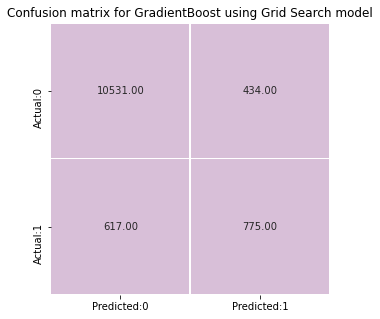

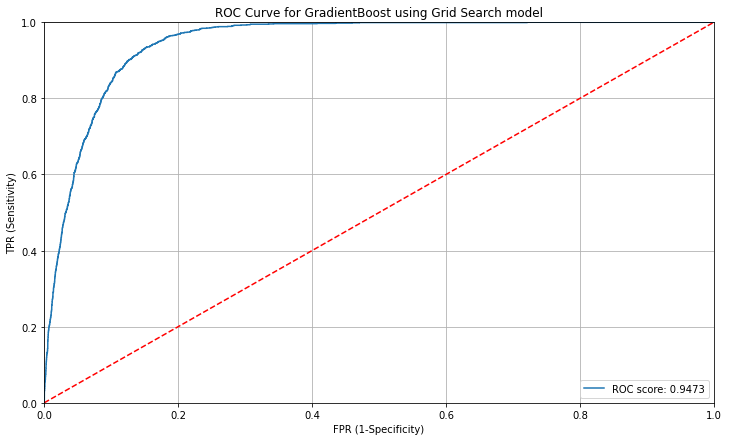

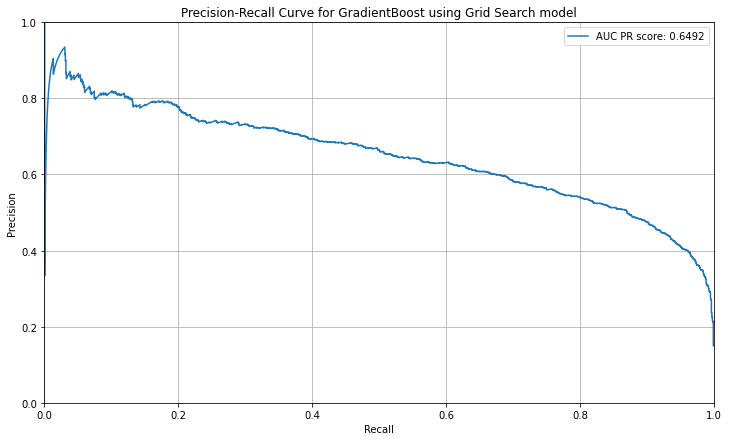

Classification report for GradientBoost using Grid Search model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.56      0.60      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.76      0.77     12357
weighted avg       0.91      0.91      0.91     12357



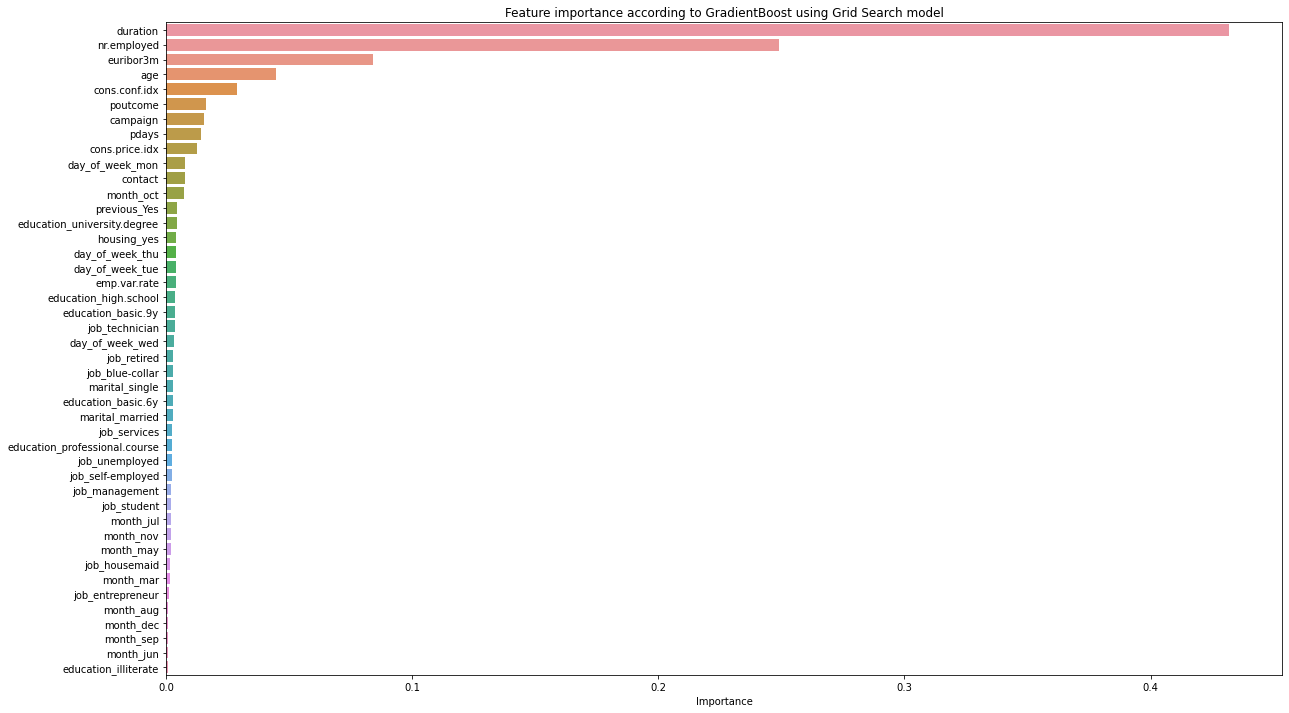

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594
8,Decision tree using Grid Search,0.943047,0.901918,0.893718,0.901918,0.896895,0.460679,0.518049,0.823696
9,Random Forest using Grid Search,0.992369,0.911629,0.902983,0.911629,0.905590,0.499942,0.640495,0.940465


In [15]:
# Grid Search over Gradient Boosting model:
params_grid = { "n_estimators" : [100, 120, 150, 200, 250, 300, 350],\
                "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015], \
                "max_depth" : [2, 3, 4, 5, 6]}

gradboost_grid = GridSearchCV(estimator=grad_boost, param_grid=params_grid, cv = 5,\
                              scoring = 'recall', n_jobs=10)
gradboost_grid = gradboost_grid.fit(X_train, y_train)

gradboost_grid = GradientBoostingClassifier(n_estimators = gradboost_grid.best_params_.get('n_estimators'),
                                  learning_rate = gradboost_grid.best_params_.get('learning_rate'),
                                  max_depth = gradboost_grid.best_params_.get('max_depth'))

gradboost_grid = gradboost_grid.fit(X_train, y_train)

plot_confusion_matrix('GradientBoost using Grid Search', gradboost_grid)
plot_roc_curve('GradientBoost using Grid Search', gradboost_grid)
plot_precision_recall_curve('GradientBoost using Grid Search', gradboost_grid)
plot_classification_report('GradientBoost using Grid Search', gradboost_grid)
plot_feature_importance('GradientBoost using Grid Search', gradboost_grid)
update_score_card('GradientBoost using Grid Search', gradboost_grid)

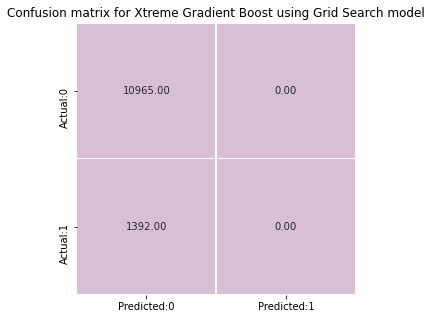

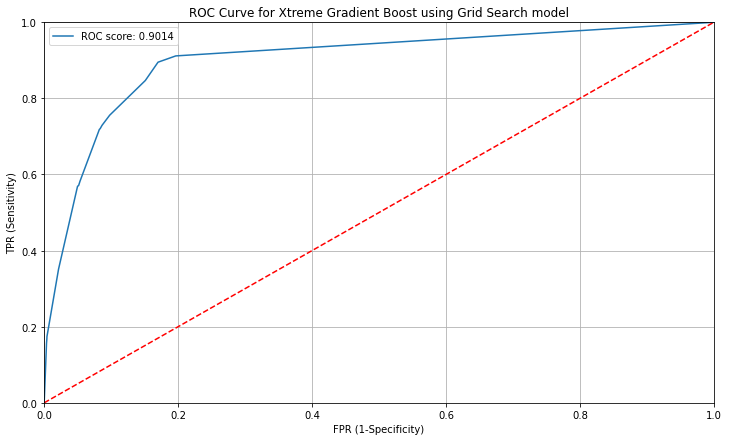

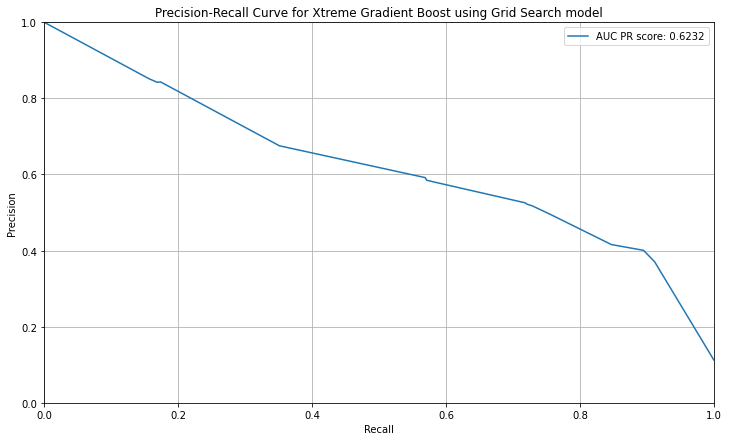

Classification report for Xtreme Gradient Boost using Grid Search model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



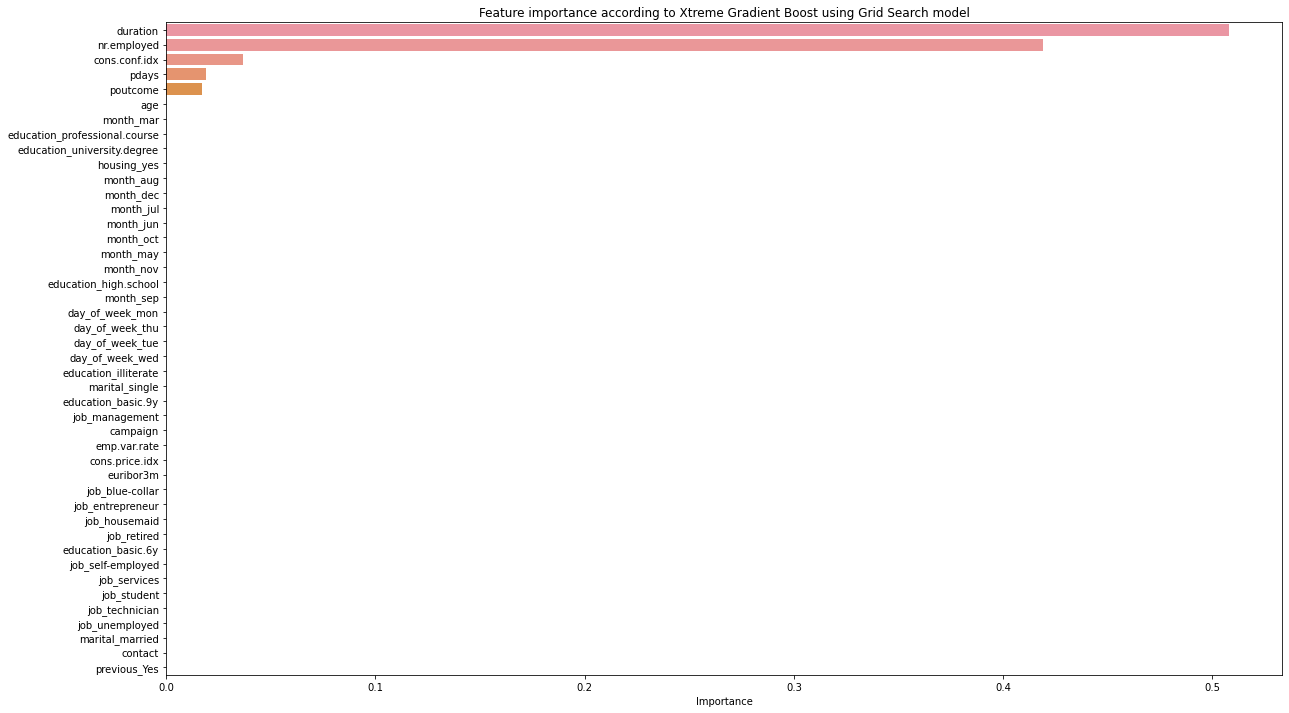

,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594
8,Decision tree using Grid Search,0.943047,0.901918,0.893718,0.901918,0.896895,0.460679,0.518049,0.823696
9,Random Forest using Grid Search,0.992369,0.911629,0.902983,0.911629,0.905590,0.499942,0.640495,0.940465


In [16]:
# Grid Search over Xtreme Gradient Boosting model:
params_grid = {"n_estimators" : [100, 120, 150],\
                "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015], \
                "max_depth" : [2, 3, 4, 5, 6]}

xgb_grid = GridSearchCV(estimator=xgb_base, param_grid=params_grid, cv = 5, scoring = 'recall', n_jobs=10)
xgb_grid = xgb_grid.fit(X_train, y_train)

xgb_grid_model = GradientBoostingClassifier(n_estimators = xgb_grid.best_params_.get('n_estimators'),
                                  learning_rate = xgb_grid.best_params_.get('learning_rate'),
                                  max_depth = xgb_grid.best_params_.get('max_depth'))

xgb_grid_model = xgb_grid_model.fit(X_train, y_train)
plot_confusion_matrix('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_roc_curve('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_precision_recall_curve('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_classification_report('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
plot_feature_importance('Xtreme Gradient Boost using Grid Search', xgb_grid_model)
update_score_card('Xtreme Gradient Boost using Grid Search', xgb_grid_model)

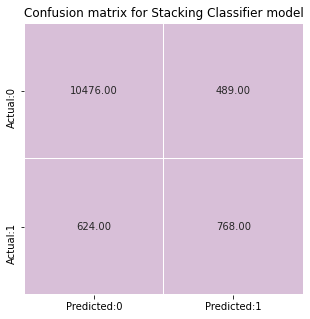

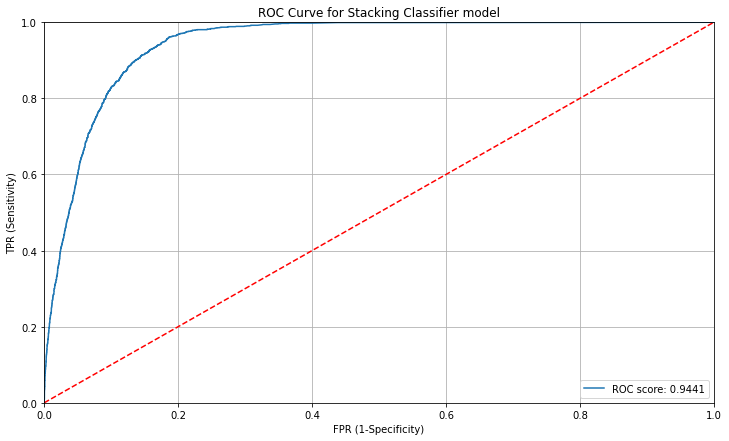

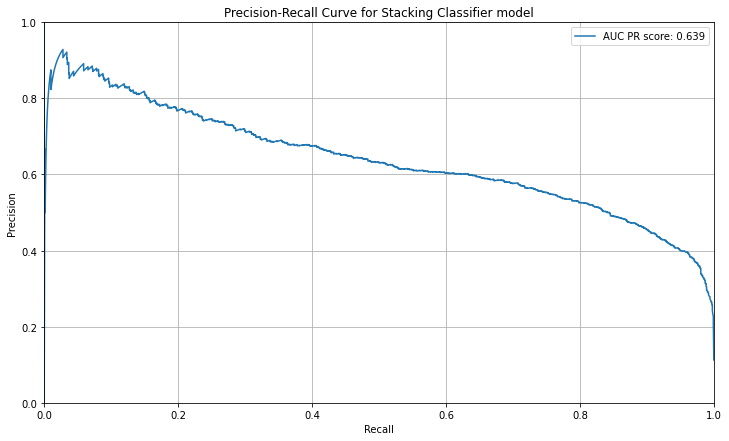

Classification report for Stacking Classifier model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.61      0.55      0.58      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.75      0.76     12357
weighted avg       0.91      0.91      0.91     12357



,model,train score,test score,precision,recall,f1_score,kappa score,auc-pr score,roc_score
0,Logistic Regression,0.911970,0.909930,0.899623,0.909930,0.902173,0.475629,0.608770,0.934566
1,K Nearest Neighbors,0.908917,0.898276,0.878559,0.898276,0.877641,0.304763,0.480638,0.836882
2,Decision tree,1.000000,0.886218,0.889381,0.886218,0.887732,0.446143,0.537590,0.729227
3,Random Forest,1.000000,0.912843,0.904659,0.912843,0.907168,0.509421,0.638901,0.939180
4,Gradient Boosting,0.923277,0.916808,0.911108,0.916808,0.913206,0.548778,0.651063,0.946643
5,AdaBoost,0.909611,0.909768,0.897977,0.909768,0.899601,0.453130,0.608503,0.936286
6,Xtreme Gradient Boost,0.923555,0.914300,0.909096,0.914300,0.911162,0.540639,0.653239,0.940849
7,Logistic Regression Using Grid Search,0.911970,0.909687,0.899344,0.909687,0.901931,0.474408,0.608782,0.934594
8,Decision tree using Grid Search,0.943047,0.901918,0.893718,0.901918,0.896895,0.460679,0.518049,0.823696
9,Random Forest using Grid Search,0.992369,0.911629,0.902983,0.911629,0.905590,0.499942,0.640495,0.940465


In [17]:
# Stacking Classifier
base_learners = [('logreg_grid', logreg_grid_model),\
                ("dt_grid_model", dtree_grid_model),\
                ('rf_grid_model', rf_grid_model),\
                ('xgb_grid_model', xgb_grid_model),\
                ('adamodel_grid', adamodel_grid)]

stack_model = StackingClassifier(estimators= base_learners, final_estimator= gradboost_grid)
stack_model = stack_model.fit(X_train, y_train)

plot_confusion_matrix('Stacking Classifier', stack_model)
plot_roc_curve('Stacking Classifier', stack_model)
plot_precision_recall_curve('Stacking Classifier', stack_model)
plot_classification_report('Stacking Classifier', stack_model)
# permutation_importance(stack_model, X_train, y_train, scoring='precision')
update_score_card('Stacking Classifier', stack_model)

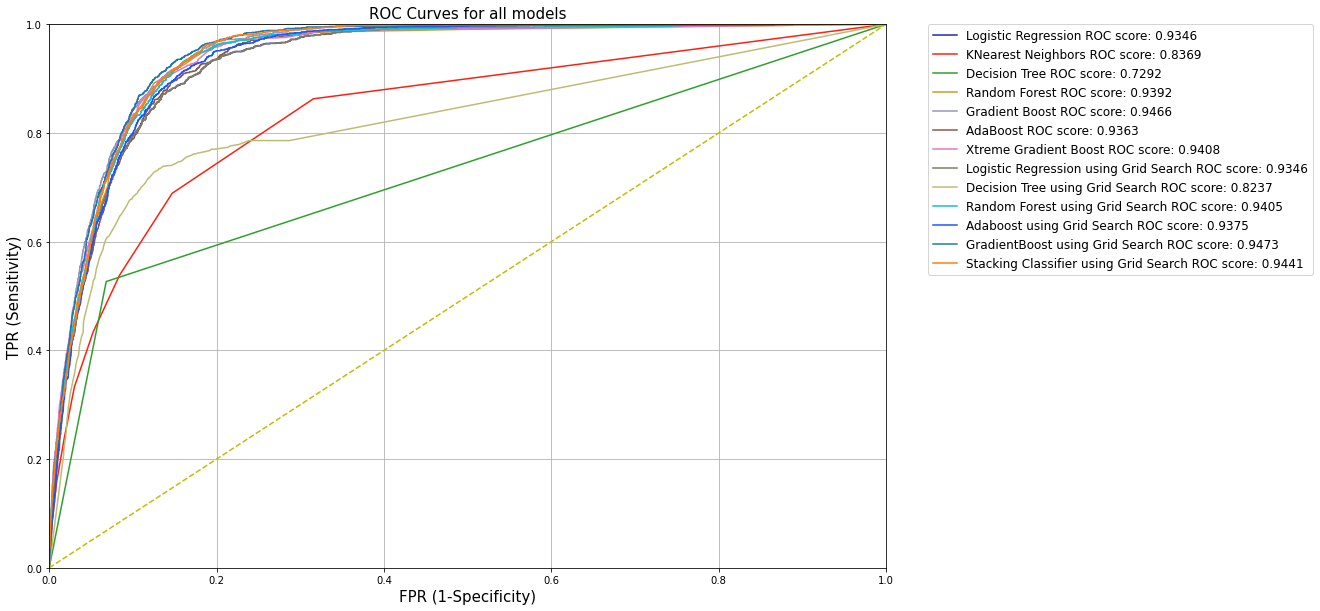

In [18]:
plt.figure(figsize = (15, 10))

model = logreg_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Logistic Regression ROC score: {}'.format(round(roc_score,4)), color = '#1f27b4')

model = kneighbors_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'KNearest Neighbors ROC score: {}'.format(round(roc_score,4)), color = '#ff1f0e')

model = dtree_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Decision Tree ROC score: {}'.format(round(roc_score,4)), color = '#2ca02c')

model = random_forest_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Random Forest ROC score: {}'.format(round(roc_score,4)), color = '#d69728')

model = grad_boost_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Gradient Boost ROC score: {}'.format(round(roc_score,4)), color = '#9497bd')

model = adaboost_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'AdaBoost ROC score: {}'.format(round(roc_score,4)), color='#8c564b' )

model = xgb_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Xtreme Gradient Boost ROC score: {}'.format(round(roc_score,4)), color = '#e377c2')

model = logreg_grid_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Logistic Regression using Grid Search ROC score: {}'.format(round(roc_score,4)),\
         color = '#7f7f5f')

model = dtree_grid_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Decision Tree using Grid Search ROC score: {}'.format(round(roc_score,4)), color = '#bcbd72')

model = rf_grid_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Random Forest using Grid Search ROC score: {}'.format(round(roc_score,4)), color = '#17becf')

model = adamodel_grid
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Adaboost using Grid Search ROC score: {}'.format(round(roc_score,4)), color = '#1a55FF')

model = gradboost_grid
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'GradientBoost using Grid Search ROC score: {}'.format(round(roc_score,4)))

model = stack_model
y_pred_proba = model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, y_pred_proba[:, 1], average = 'weighted')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, label = 'Stacking Classifier using Grid Search ROC score: {}'.format(round(roc_score,4)))



plt.plot([0,1], [0,1], 'y--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR (1-Specificity)', fontsize = 15)
plt.ylabel('TPR (Sensitivity)', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0., fontsize = 12)
plt.grid()
plt.title("ROC Curves for all models", fontsize = 15)
plt.show()

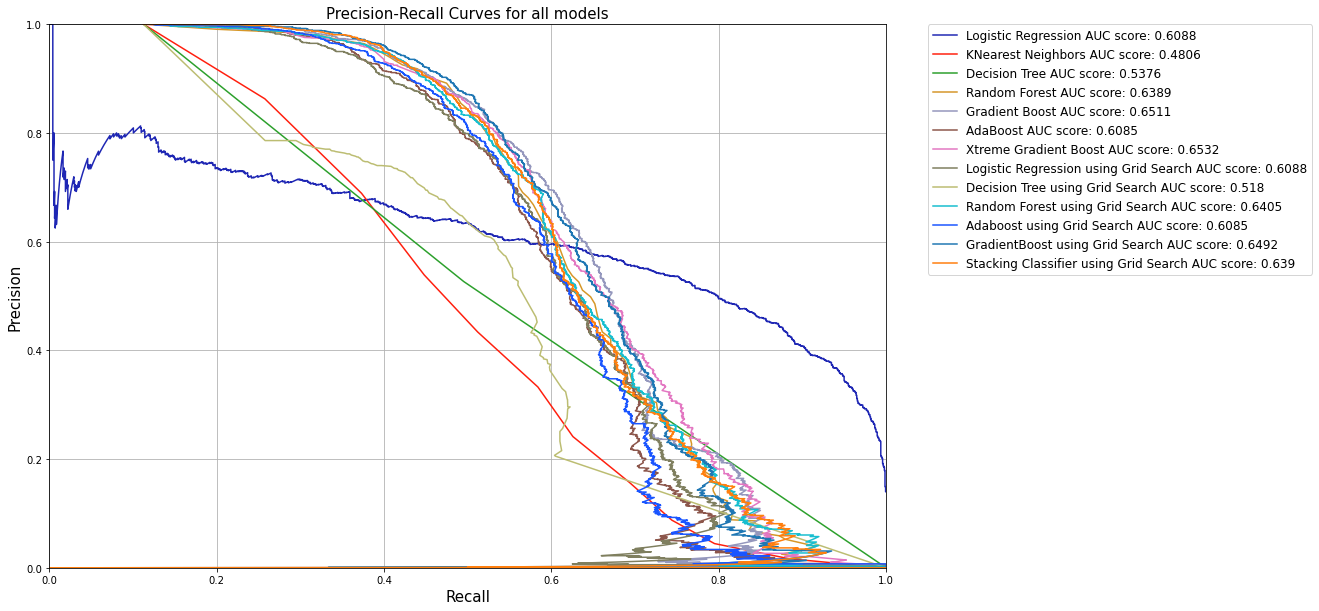

In [19]:
plt.figure(figsize = (15, 10))

model = logreg_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(recall, precision, label = 'Logistic Regression AUC score: {}'.format(round(prec_score,4)), color = '#1f27b4')

model = kneighbors_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'KNearest Neighbors AUC score: {}'.format(round(prec_score,4)), color = '#ff1f0e')

model = dtree_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Decision Tree AUC score: {}'.format(round(prec_score,4)), color = '#2ca02c')

model = random_forest_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Random Forest AUC score: {}'.format(round(prec_score,4)), color = '#d69728')

model = grad_boost_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Gradient Boost AUC score: {}'.format(round(prec_score,4)), color = '#9497bd')

model = adaboost_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'AdaBoost AUC score: {}'.format(round(prec_score,4)), color='#8c564b' )

model = xgb_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Xtreme Gradient Boost AUC score: {}'.format(round(prec_score,4)), color = '#e377c2')

model = logreg_grid_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Logistic Regression using Grid Search AUC score: {}'.format(round(prec_score,4)),\
         color = '#7f7f5f')

model = dtree_grid_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Decision Tree using Grid Search AUC score: {}'.format(round(prec_score,4)), \
         color = '#bcbd72')

model = rf_grid_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Random Forest using Grid Search AUC score: {}'.format(round(prec_score,4)), \
         color = '#17becf')

model = adamodel_grid
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Adaboost using Grid Search AUC score: {}'.format(round(prec_score,4)),\
         color = '#1a55FF')

model = gradboost_grid
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'GradientBoost using Grid Search AUC score: {}'.format(round(prec_score,4)))

model = stack_model
y_pred_proba = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
prec_score = auc(recall, precision)
plt.plot(precision, recall,label = 'Stacking Classifier using Grid Search AUC score: {}'.format(round(prec_score,4)))

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0., fontsize = 12)
plt.grid()
plt.title("Precision-Recall Curves for all models", fontsize = 15)
plt.show()    